In [1]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import plotly as py
from shapely.geometry import Point, Polygon
import plotly.express as px
import requests
import folium
from pykml import parser


In [74]:
graph_city = ox.graph_from_place('Amsterdam', network_type = "all")

In [8]:
graph_water = ox.graph_from_point(ox.geocoder.geocode("Henri Polaklaan, Amsterdam"), custom_filter='["waterway"~"canal|river"]', dist=1000, simplify=True)

In [9]:
swim_route_update = [252142901, 331854233, 60740166, 178249906, 178261156, 117738509, 323968073,  252100239, 3781170134, 2853837615, 323901705]



In [10]:
swim_route_path = []
for i in range(len(swim_route_update) - 1):
    path = nx.shortest_path(graph_water, swim_route_update[i], swim_route_update[i+1])
    swim_route_path.extend(path[1:])
print(swim_route_path)

[331854233, 323929882, 60740166, 178249906, 178261156, 117738509, 60740168, 323968073, 252100239, 3781170134, 2853837615, 323909176, 252116496, 323901705]


In [11]:
x_co = 0.0
y_co = 0.0

for node in swim_route_path:
    x_co += graph_water.nodes[node]['x']
    y_co += graph_water.nodes[node]['y']

ave_x = x_co / len(swim_route_path)
ave_y = y_co / len(swim_route_path)
center_point = (ave_x, ave_y) 

In [19]:
start_point = graph_water.nodes[swim_route_path[0]]
end_point = graph_water.nodes[swim_route_path[-1]]

In [20]:
start_point

{'y': 52.3715129, 'x': 4.9135219, 'street_count': 5}

In [16]:
graph_city[swim_route_path[0]]

KeyError: 331854233

In [84]:
graph_city = ox.graph_from_point((ave_y, ave_x), dist=1000, network_type = "all")


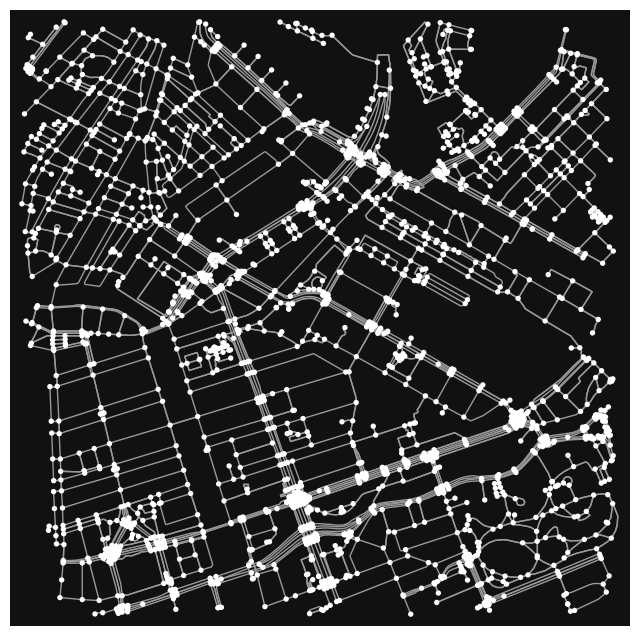

In [58]:
fig, ax = ox.plot_graph(graph_city)

In [85]:
start_node = ox.nearest_nodes(graph_city, start_point['x'], start_point['y'], return_dist= True)
end_node = ox.nearest_nodes(graph_city, end_point['x'], end_point['y'], return_dist= True)
center_node = ox.nearest_nodes(graph_city, center_point[0], center_point[1], return_dist= True)

In [72]:
center

NameError: name 'center' is not defined

In [76]:
center_node = ox.nearest_nodes(graph_city, center_point[0], center_point[1])
graph_city.nodes[center_node]

{'y': 52.3663277, 'x': 4.9085689, 'street_count': 3}

In [65]:
center_node

46361837

In [86]:
start_centrality = nx.closeness_centrality(graph_city, start_node[0])

In [87]:
start_centrality

0.036782635029730344

In [88]:
nx.closeness_centrality(graph_city, center_node[0])

0.03869715676880057

In [89]:
nx.closeness_centrality(graph_city, end_node[0])

0.03639278879310031

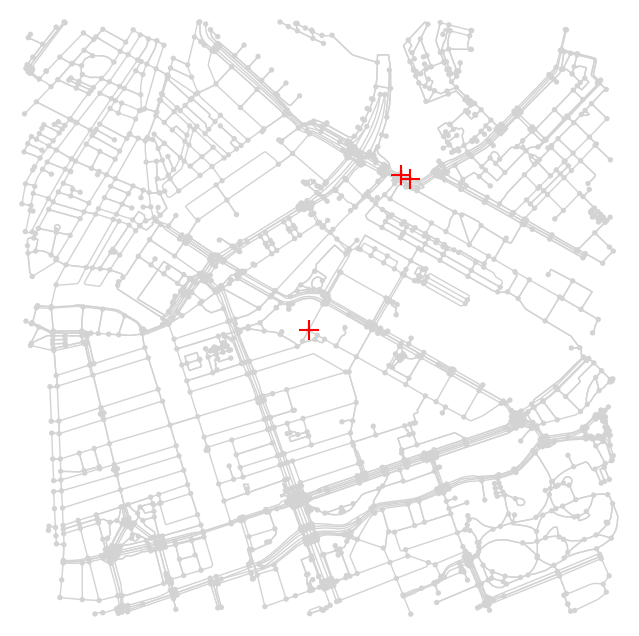

In [90]:
fig, ax = ox.plot_graph(graph_city, show = False, bgcolor='white', node_color="lightgrey", edge_color="lightgrey")
ax.scatter(4.9131553, 52.3710485, c='red',marker = "+", s=200) 
ax.scatter(4.9135805, 52.3709291, c='red',marker = "+", s=200) 
ax.scatter(4.9085689, 52.3663277, c='red',marker = "+", s=200) 
plt.show()